In [6]:
from maskr.ipstartup import *
from skimage.io import imread
from maskr.models.maskrcnn import MaskRCNN
from maskr.samples.coco.config import Config
from maskr.utils import visualize
import torch
from pathlib import Path

ROOT_DIR = Path("/home/ubuntu/maskr")
IMAGES = ROOT_DIR/"data/images"

class Config(Config):
    IMAGES_PER_GPU = 1
config = Config()

[root:INFO]:starting (cellevents.py:36, time=17:46)


time: 18.2 ms


In [7]:
model = MaskRCNN(config)
_ = model.load_state_dict(torch.load(config.WEIGHTS))

[root:INFO]:starting (cellevents.py:36, time=17:46)


time: 821 ms


In [8]:
image1 = imread(f'{IMAGES}/streetscene.jpg')
image2 = imread(f'{IMAGES}/suitcase.jpg')
images = [image1, image2]
results = model.predict(images)

[root:INFO]:starting (cellevents.py:36, time=17:46)


time: 2min 20s


[root:INFO]:starting (cellevents.py:36, time=17:49)


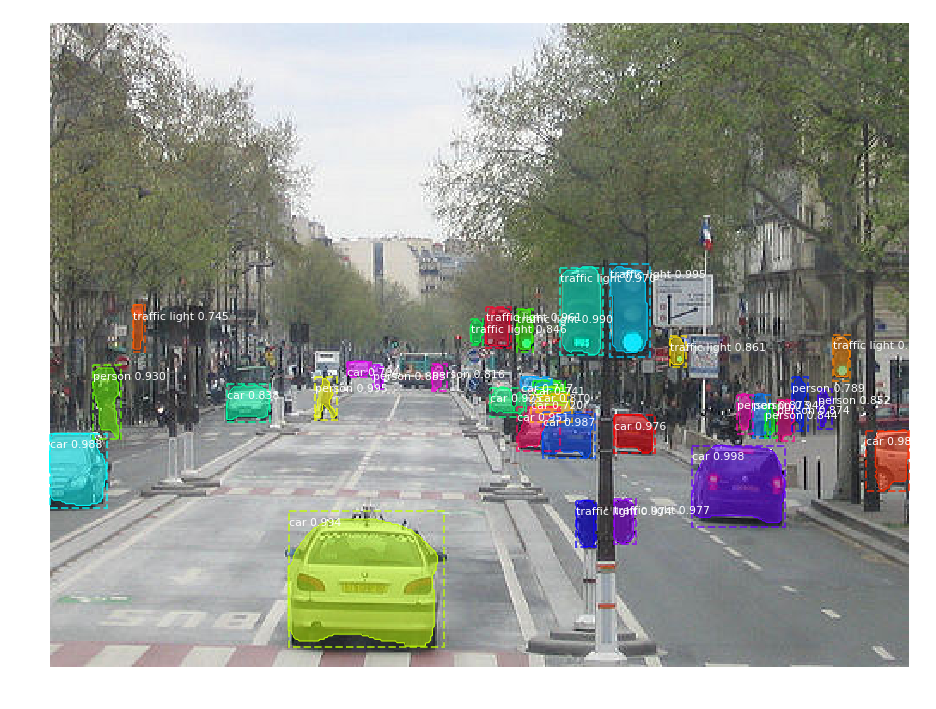

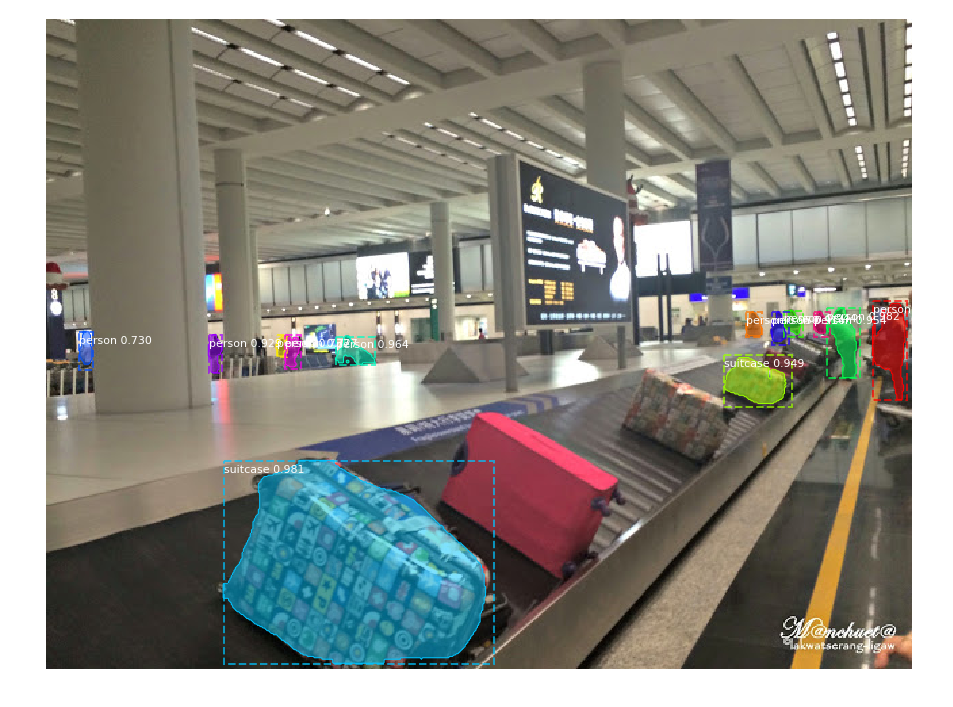

time: 2.72 s


In [9]:
# Visualize results
for image, res in zip(images, results):
    boxes, class_ids, scores, masks = res
    visualize.display_instances(image, boxes, masks, class_ids, config.CLASS_NAMES, scores)
    plt.show()